In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
im = cv2.imread("karthick.png")
type(im)

numpy.ndarray

In [3]:
im.shape

(852, 855, 3)

In [4]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

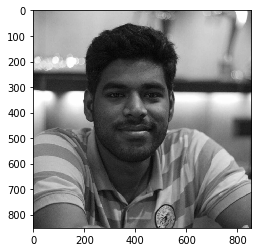

In [5]:
im_copy = im    
gray = rgb2gray(im)    
plt.imshow(gray,cmap = plt.get_cmap('gray'))
plt.show()

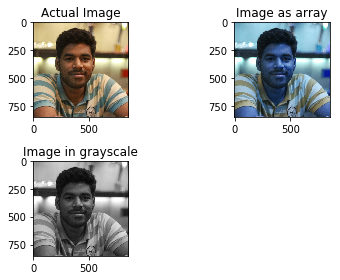

In [50]:
plt.subplot(2,2,1)
plt.title("Actual Image")
plt.imshow(plt.imread('karthick.png'))
plt.subplot(2,2,2)
plt.title("Image as array")
plt.imshow(im)
plt.subplot(2,2,3)
plt.title("Image in grayscale")
plt.imshow(gray,cmap = plt.get_cmap('gray'))
plt.tight_layout()
plt.show()

In [36]:
# Unidimensional kernel

In [35]:
array = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
kernel = np.array([1, -1, 0]) #kernel to detect edges
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [37]:
array = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
kernel = np.array([1, -1, 0])
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Output array
for ii in range(8):
    conv[ii] = (kernel * array[ii:ii+3]).sum()

# Print conv
print(conv)

[ 1 -1  1 -1  1 -1  1 -1  0  0]


In [40]:
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
result = np.zeros(im.shape)

# Output array
for ii in range(im.shape[0] - 3):
    for jj in range(im.shape[1] - 3):
        result[ii, jj] = (im[ii:ii+3, jj:jj+3] * kernel).sum()

In [ ]:
#Keras 'Convolution' layer

In [53]:
# Input data

data =np.load('fashion.npz')
type(data)

data = data.f.arr_0.tolist()
train_data = data['train_data']
train_labels = data['train_labels']
test_data = data['test_data']
test_labels = data['test_labels']

img_rows = train_data.shape[1]
img_cols = train_data.shape[2]

In [54]:
# Import the necessary components from Keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

# Initialize the model object
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Flatten the output of the convolutional layer
model.add(Flatten())
# Add an output layer for the 3 categories
model.add(Dense(3, activation='softmax'))

In [ ]:
# Compile the model 
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model on a training set
model.fit(train_data, train_labels, 
          validation_split=0.2, 
          epochs=3, batch_size=10)

Train on 40 samples, validate on 10 samples
Epoch 1/3


In [ ]:
# Evaluate the model on separate test data
model.evaluate(test_data,test_labels,batch_size=10)

In [ ]:
# Initialize the model
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
                 input_shape=(img_rows, img_cols, 1), 
                 padding="same"))

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [1]:
# Initialize the model
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
                 input_shape=(img_rows, img_cols, 1), 
                 strides=2))

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

NameError: name 'Sequential' is not defined

In [ ]:
# Max Pooling

In [ ]:
# Result placeholder
result = np.zeros((im.shape[0]//2, im.shape[1]//2))

# Pooling operation
for ii in range(result.shape[0]):
    for jj in range(result.shape[1]):
        result[ii, jj] = np.max(im[ii*2:ii*2+2,jj*2:jj*2+2])

In [ ]:
# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Add a pooling operation
model.add(MaxPool2D(2))

# Add another convolutional layer
model.add(Conv2D(15,kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()

In [ ]:
# Compile model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model to training data 
model.fit(train_data, train_labels, 
          validation_split=0.2, 
          epochs=3, batch_size=10)

# Evaluate the model on test data
model.evaluate(test_data, test_labels, batch_size=10)

In [ ]:
training = model.fit(train_data,train_labels,validation_split=0.2,epochs=3,batch_size=10)

# Extract the history from the training object
history = training.history

# Plot the training loss 
plt.plot(history['loss'])
# Plot the validation loss
plt.plot(history['val_loss'])

# Show the figure
plt.show()